**Group Project #3**

# Introduction

During February 2020, three winter storms battered the state of Texas, causing severely frigid conditions and electrical system grid failures that were unprecedented. As Texans cranked up their heaters to combat plunging temperatures, a record surge of electricity demand set off a disastrous chain reaction in the state’s power grid. [1] Power outages quickly spread statewide as worsening weather conditions caused failures in every type of power source available including natural gas, coal, wind and nuclear. With the state's electricity infrastructure on the brink of total collapse, the grid operating company, ERCOT, monitored the difference between the remaining supply of power on the grid and the increasing demand for that power. As the margins between the two narrowed to dangerously low levels, grid operators enacted emergency protocols to cut off power supply to Texans, leaving millions in the cold and dark for days. If operators had not acted in that moment, the state could have suffered blackouts that “could have occurred for months,” and left Texas in an “indeterminately long” crisis. [2]

According to data from the state health department, at least 57 people died in Texas as a result of the storms, with the majority dying due to hypothermia. [3] Texas is the only state in the United States with a private, isolated grid, which is why when demand suddenly surged due to extreme conditions, and their own grids were down, they couldn’t tap into emergency resources from nearby state grids. Also important to note is that ERCOT operates the only major U.S. grid that does not have a capacity market - a system that provides payments to operators to be on standby to supply power during severe weather events. [1]

Prior to this catastrophic event, even though ERCOT estimated how much power it would need under different weather scenarios, the reality exceeded even its extreme forecasts and resulted in a massive forecast error. [4] In order to prevent more disasters like this in the future, operators should spend more time trying to accurately forecast demand against supply in various scenarios through deep learning. Industry experts say that protecting the U.S. power grid from serious outages, like the one in Texas, will require a better use of data analytics, modeling and policy making. [5] By taking a few years of weather and demand data, deep learning techniques can be applied for the purpose of predicting the demand on the electric grid as a function of weather, and hopefully being able to prevent system disasters, such as this one, in the future.

[1] https://www.reuters.com/article/us-usa-weather-texas-power-insight/why-a-predictable-cold-snap-crippled-the-texas-power-grid-idUSKBN2AL00N

[2] https://www.texastribune.org/2021/02/18/texas-power-outages-ercot/

[3] https://www.texastribune.org/2021/03/15/texas-winter-storm-deaths/

[4] https://www.cnbc.com/2021/02/17/how-the-texas-power-grid-failed-and-what-could-stop-it-from-happening-again.html

[5] https://www.techrepublic.com/article/texas-power-outage-data-analytics-modeling-and-policy-making-will-be-key-to-preventing-similar-disasters/

# Reading the demand and weather data
Make sure you subset your data to be between 2011 and 2014 - we will use a random week of data from 2015 to test your final models!

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import date
import calendar

# Demand Data

Read the demand data.

In [ ]:
# https://drive.google.com/file/d/1M7-XiHcfboUzKZ-tmflDomy_IuRAvnw9/view?usp=sharing
!gdown --id 1M7-XiHcfboUzKZ-tmflDomy_IuRAvnw9

Downloading...
From: https://drive.google.com/uc?id=1M7-XiHcfboUzKZ-tmflDomy_IuRAvnw9
To: /content/Ercot_2011_2021_feb.csv
3.52MB [00:00, 55.0MB/s]


In [ ]:
energy = pd.read_csv('Ercot_2011_2021_feb.csv') # it just downloaded locally to your workspace!
energy.head()

,Unnamed: 0,Date,HE,MWh
0,0,2010-01-01,1,32094.064435
1,1,2010-01-01,2,32171.322546
2,2,2010-01-01,3,32241.752463
3,3,2010-01-01,4,32459.193227
4,4,2010-01-01,5,33123.751047


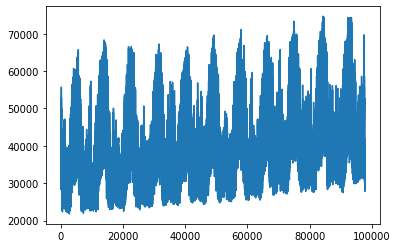

In [ ]:
# this is your target variable
energy['MWh'].plot()

Pretty cool - looks like energy variabes between 20K and 70K megawatts.

In [ ]:
print(energy['Date'].min())
print(energy['Date'].max())

2010-01-01
2021-03-01


In [ ]:
#converting the datatype of date column from object to date
energy['Date'] = pd.to_datetime(energy.Date) + energy.HE.astype('timedelta64[h]')
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97848 entries, 0 to 97847
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  97848 non-null  int64         
 1   Date        97848 non-null  datetime64[ns]
 2   HE          97848 non-null  int64         
 3   MWh         97847 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.0 MB


In [ ]:
#sampling the data to get the records between 2011 to 2014
energy_train = energy[energy.Date.between('2011-01-01', '2015-12-31')]
energy_train.head()

,Unnamed: 0,Date,HE,MWh
8759,8759,2011-01-01 00:00:00,0,28496.388850
8760,8760,2011-01-01 01:00:00,1,27662.443480
8761,8761,2011-01-01 02:00:00,2,27250.044715
8762,8762,2011-01-01 03:00:00,3,26783.226081
8763,8763,2011-01-01 04:00:00,4,26676.468490


In [ ]:
#Dropping unnecesary column
del energy_train['Unnamed: 0']
energy_train.head()

,Date,HE,MWh
8759,2011-01-01 00:00:00,0,28496.388850
8760,2011-01-01 01:00:00,1,27662.443480
8761,2011-01-01 02:00:00,2,27250.044715
8762,2011-01-01 03:00:00,3,26783.226081
8763,2011-01-01 04:00:00,4,26676.468490


In [ ]:
energy_train.tail()

,Date,HE,MWh
52555,2015-12-30 20:00:00,20,39674.167296
52556,2015-12-30 21:00:00,21,39485.829257
52557,2015-12-30 22:00:00,22,38711.458864
52558,2015-12-30 23:00:00,23,37254.930151
52559,2015-12-31 00:00:00,0,35517.364870


# Weather Data

Read the weather data.

In [ ]:
# https://drive.google.com/file/d/1vl2RKquLYS1QRyYE7ySIj24jPnXFp2od/view?usp=sharing
!gdown --id 1vl2RKquLYS1QRyYE7ySIj24jPnXFp2od

Downloading...
From: https://drive.google.com/uc?id=1vl2RKquLYS1QRyYE7ySIj24jPnXFp2od
To: /content/FST.csv
97.2MB [00:01, 83.1MB/s]


In [ ]:
weather = pd.read_csv('FST.csv')
weather.head()

,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
0,FST,2010-01-01 00:53,30.02,24.98,81.27,180.00,5.00,M,30.50,1031.80,10.00,M,CLR,,,M,M,M,M,M,M,M,M,M,M,M,M,24.04,METAR KFST 010553Z AUTO 18005KT 10SM CLR M01/M...
1,FST,2010-01-01 01:53,28.04,24.08,84.87,190.00,5.00,M,30.49,1031.30,10.00,M,CLR,,,M,M,M,M,M,M,M,M,M,M,M,M,21.69,METAR KFST 010653Z AUTO 19005KT 10SM CLR M02/M...
2,FST,2010-01-01 02:53,26.96,23.00,84.80,220.00,9.00,M,30.47,1030.90,10.00,M,CLR,,,M,M,M,M,M,M,M,M,M,M,M,M,17.25,METAR KFST 010753Z AUTO 22009KT 10SM CLR M03/M...
3,FST,2010-01-01 03:53,26.96,23.00,84.80,210.00,8.00,M,30.46,1030.40,10.00,M,CLR,,,M,M,M,M,M,M,M,M,M,M,M,M,17.90,METAR KFST 010853Z AUTO 21008KT 10SM CLR M03/M...
4,FST,2010-01-01 04:53,28.04,23.00,81.11,220.00,12.00,M,30.44,1030.00,10.00,M,CLR,,,M,M,M,M,M,M,M,M,M,M,M,M,16.96,METAR KFST 010953Z AUTO 22012KT 10SM CLR M02/M...


In [ ]:
# convert time stamp to datetime for interpolation
weather['valid'] = pd.to_datetime(weather['valid'])
weather.dtypes

station                      object
valid                datetime64[ns]
tmpf                         object
dwpf                         object
relh                         object
drct                         object
sknt                         object
p01i                         object
alti                         object
mslp                         object
vsby                         object
gust                         object
skyc1                        object
skyc2                        object
skyc3                        object
skyc4                        object
skyl1                        object
skyl2                        object
skyl3                        object
skyl4                        object
wxcodes                      object
ice_accretion_1hr            object
ice_accretion_3hr            object
ice_accretion_6hr            object
peak_wind_gust               object
peak_wind_drct               object
peak_wind_time               object
feel                        

In [ ]:
# look at the datetime range
print(weather['valid'].min())
print(weather['valid'].max())

2010-01-01 00:53:00
2021-02-19 23:55:00


In [ ]:
# set the datetime as the index so you can do interpolation later
weather.set_index(weather['valid'], inplace=True)
weather.head() # see how the valid column is now the index? this will allow
                # you to do resampling to hourly resolution

,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
valid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:53:00,FST,2010-01-01 00:53:00,30.02,24.98,81.27,180.00,5.00,M,30.50,1031.80,10.00,M,CLR,,,M,M,M,M,M,M,M,M,M,M,M,M,24.04,METAR KFST 010553Z AUTO 18005KT 10SM CLR M01/M...
2010-01-01 01:53:00,FST,2010-01-01 01:53:00,28.04,24.08,84.87,190.00,5.00,M,30.49,1031.30,10.00,M,CLR,,,M,M,M,M,M,M,M,M,M,M,M,M,21.69,METAR KFST 010653Z AUTO 19005KT 10SM CLR M02/M...
2010-01-01 02:53:00,FST,2010-01-01 02:53:00,26.96,23.00,84.80,220.00,9.00,M,30.47,1030.90,10.00,M,CLR,,,M,M,M,M,M,M,M,M,M,M,M,M,17.25,METAR KFST 010753Z AUTO 22009KT 10SM CLR M03/M...
2010-01-01 03:53:00,FST,2010-01-01 03:53:00,26.96,23.00,84.80,210.00,8.00,M,30.46,1030.40,10.00,M,CLR,,,M,M,M,M,M,M,M,M,M,M,M,M,17.90,METAR KFST 010853Z AUTO 21008KT 10SM CLR M03/M...
2010-01-01 04:53:00,FST,2010-01-01 04:53:00,28.04,23.00,81.11,220.00,12.00,M,30.44,1030.00,10.00,M,CLR,,,M,M,M,M,M,M,M,M,M,M,M,M,16.96,METAR KFST 010953Z AUTO 22012KT 10SM CLR M02/M...


You are welcome to use all fields if you would like (not recommended), but I recommend you focus on:
* tmpf
*	dwpf
*	relh

Since these are the three variables that determine who turns on their heat or airconditioner. You should coerce these three variables to numeric (the missing values are currently coded as 'M'), which is why the data type is object right now.

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 581124 entries, 2010-01-01 00:53:00 to 2021-02-19 23:55:00
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   station            581124 non-null  object        
 1   valid              581124 non-null  datetime64[ns]
 2   tmpf               581124 non-null  object        
 3   dwpf               581124 non-null  object        
 4   relh               581124 non-null  object        
 5   drct               581124 non-null  object        
 6   sknt               581124 non-null  object        
 7   p01i               581124 non-null  object        
 8   alti               581124 non-null  object        
 9   mslp               581124 non-null  object        
 10  vsby               581124 non-null  object        
 11  gust               581124 non-null  object        
 12  skyc1              581124 non-null  object        
 13  skyc2     

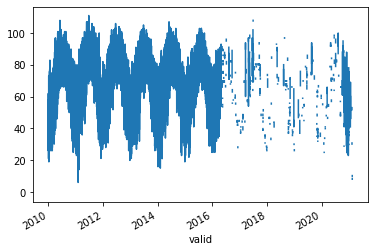

In [ ]:
weather['tmpf'] = pd.to_numeric(weather['tmpf'], errors='coerce')
weather['tmpf'].plot()

Scroll down and you will find the data dictionary on this webpage: https://
mesonet.agron.iastate.edu/request/download.phtml

#Data Resampling and Cleaning

In [ ]:
# #Subset data between 2011 and 2014
weather_train = weather.loc['2011-01-01':'2015-12-31']
weather_train

,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
valid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:53:00,FST,2011-01-01 00:53:00,32.00,17.96,55.72,230.00,8.00,M,30.02,1015.50,10.00,-99.00,CLR,,,,M,M,M,M,M,M,M,M,M,M,M,24.11,KFST 010553Z AUTO 23008KT 10SM CLR 00/M08 A300...
2011-01-01 01:53:00,FST,2011-01-01 01:53:00,33.08,19.04,55.89,250.00,7.00,M,30.03,1015.60,10.00,-99.00,CLR,,,,M,M,M,M,M,M,M,M,M,M,M,26.10,KFST 010653Z AUTO 25007KT 10SM CLR 01/M07 A300...
2011-01-01 02:53:00,FST,2011-01-01 02:53:00,33.08,17.96,53.36,270.00,9.00,M,30.05,1016.20,10.00,-99.00,CLR,,,,M,M,M,M,M,M,M,M,M,M,M,24.86,KFST 010753Z AUTO 27009KT 10SM CLR 01/M08 A300...
2011-01-01 03:53:00,FST,2011-01-01 03:53:00,32.00,19.04,58.37,250.00,7.00,M,30.06,1016.60,10.00,-99.00,CLR,,,,M,M,M,M,M,M,M,M,M,M,M,24.78,KFST 010853Z AUTO 25007KT 10SM CLR 00/M07 A300...
2011-01-01 04:53:00,FST,2011-01-01 04:53:00,30.02,19.04,63.24,260.00,7.00,M,30.07,1017.20,10.00,-99.00,CLR,,,,M,M,M,M,M,M,M,M,M,M,M,22.37,KFST 010953Z AUTO 26007KT 10SM CLR M01/M07 A30...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 22:30:00,FST,2015-12-31 22:30:00,39.92,37.94,92.56,20.00,6.00,0.00,30.31,M,7.00,M,SCT,M,M,M,400.00,M,M,M,M,M,M,M,M,M,M,35.07,KFST 010330Z AUTO 02006KT 7SM SCT004 04/03 A30...
2015-12-31 22:39:00,FST,2015-12-31 22:39:00,39.92,37.94,92.56,30.00,5.00,0.00,30.31,M,6.00,M,BKN,M,M,M,400.00,M,M,M,BR,M,M,M,M,M,M,35.80,KFST 010339Z AUTO 03005KT 6SM BR BKN004 04/03 ...
2015-12-31 22:53:00,FST,2015-12-31 22:53:00,39.92,39.02,96.55,30.00,4.00,0.00,30.33,1026.10,6.00,M,OVC,M,M,M,400.00,M,M,M,BR,M,M,M,M,M,M,36.67,KFST 010353Z AUTO 03004KT 6SM BR OVC004 04/04 ...


In [ ]:
# dropping extra columns
weather_train = weather_train.iloc[:,[1,2,3,4]]
weather_train.head(20)

,valid,tmpf,dwpf,relh
valid,,,,
2011-01-01 00:53:00,2011-01-01 00:53:00,32.00,17.96,55.72
2011-01-01 01:53:00,2011-01-01 01:53:00,33.08,19.04,55.89
2011-01-01 02:53:00,2011-01-01 02:53:00,33.08,17.96,53.36
2011-01-01 03:53:00,2011-01-01 03:53:00,32.00,19.04,58.37
2011-01-01 04:53:00,2011-01-01 04:53:00,30.02,19.04,63.24
2011-01-01 05:53:00,2011-01-01 05:53:00,32.00,21.02,63.51
2011-01-01 06:53:00,2011-01-01 06:53:00,33.08,21.02,60.81
2011-01-01 07:53:00,2011-01-01 07:53:00,33.08,17.96,53.36
2011-01-01 08:53:00,2011-01-01 08:53:00,33.98,14.00,43.34


In [ ]:
#Repacing M with NaN to mak the data ready for imputation
weather_train = weather_train.replace('M', np.NAN)
weather_train.head(20)

,valid,tmpf,dwpf,relh
valid,,,,
2011-01-01 00:53:00,2011-01-01 00:53:00,32.00,17.96,55.72
2011-01-01 01:53:00,2011-01-01 01:53:00,33.08,19.04,55.89
2011-01-01 02:53:00,2011-01-01 02:53:00,33.08,17.96,53.36
2011-01-01 03:53:00,2011-01-01 03:53:00,32.00,19.04,58.37
2011-01-01 04:53:00,2011-01-01 04:53:00,30.02,19.04,63.24
2011-01-01 05:53:00,2011-01-01 05:53:00,32.00,21.02,63.51
2011-01-01 06:53:00,2011-01-01 06:53:00,33.08,21.02,60.81
2011-01-01 07:53:00,2011-01-01 07:53:00,33.08,17.96,53.36
2011-01-01 08:53:00,2011-01-01 08:53:00,33.98,14.00,43.34


In [ ]:
#resampling data to hourly resolution
weather_train = weather_train.resample('60T').max()

In [ ]:
#Changing datatypes of dwpf and relh from object to numeric
weather_train['tmpf'] = pd.to_numeric(weather_train['tmpf'])
weather_train['dwpf'] = pd.to_numeric(weather_train['dwpf'])
weather_train['relh'] = pd.to_numeric(weather_train['relh'])

weather_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2011-01-01 00:00:00 to 2015-12-31 23:00:00
Freq: 60T
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   valid   43489 non-null  datetime64[ns]
 1   tmpf    43309 non-null  float64       
 2   dwpf    43269 non-null  float64       
 3   relh    42904 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.7 MB


In [ ]:
#As we can see, M has been replaced wit NaN, now using ffill and bfill to impute missing data
energy_train = energy_train.fillna(method = 'ffill').fillna(method='bfill')
energy_train.head(20)

,Date,HE,MWh
8759,2011-01-01 00:00:00,0,28496.388850
8760,2011-01-01 01:00:00,1,27662.443480
8761,2011-01-01 02:00:00,2,27250.044715
8762,2011-01-01 03:00:00,3,26783.226081
8763,2011-01-01 04:00:00,4,26676.468490
8764,2011-01-01 05:00:00,5,26868.802537
8765,2011-01-01 06:00:00,6,27640.755062
8766,2011-01-01 07:00:00,7,28768.878874
8767,2011-01-01 08:00:00,8,29580.535108
8768,2011-01-01 09:00:00,9,30454.860274


In [ ]:
#As we can see, M has been replaced wit NaN, now using ffill and bfill to impute missing data
weather_train = weather_train.fillna(method = 'ffill').fillna(method='bfill')
weather_train.head(20)

,valid,tmpf,dwpf,relh
valid,,,,
2011-01-01 00:00:00,2011-01-01 00:53:00,32.00,17.96,55.72
2011-01-01 01:00:00,2011-01-01 01:53:00,33.08,19.04,55.89
2011-01-01 02:00:00,2011-01-01 02:53:00,33.08,17.96,53.36
2011-01-01 03:00:00,2011-01-01 03:53:00,32.00,19.04,58.37
2011-01-01 04:00:00,2011-01-01 04:53:00,30.02,19.04,63.24
2011-01-01 05:00:00,2011-01-01 05:53:00,32.00,21.02,63.51
2011-01-01 06:00:00,2011-01-01 06:53:00,33.08,21.02,60.81
2011-01-01 07:00:00,2011-01-01 07:53:00,33.08,17.96,53.36
2011-01-01 08:00:00,2011-01-01 08:53:00,33.98,14.00,43.34


In [ ]:
weather_train.head(20)

,valid,tmpf,dwpf,relh
valid,,,,
2011-01-01 00:00:00,2011-01-01 00:53:00,32.00,17.96,55.72
2011-01-01 01:00:00,2011-01-01 01:53:00,33.08,19.04,55.89
2011-01-01 02:00:00,2011-01-01 02:53:00,33.08,17.96,53.36
2011-01-01 03:00:00,2011-01-01 03:53:00,32.00,19.04,58.37
2011-01-01 04:00:00,2011-01-01 04:53:00,30.02,19.04,63.24
2011-01-01 05:00:00,2011-01-01 05:53:00,32.00,21.02,63.51
2011-01-01 06:00:00,2011-01-01 06:53:00,33.08,21.02,60.81
2011-01-01 07:00:00,2011-01-01 07:53:00,33.08,17.96,53.36
2011-01-01 08:00:00,2011-01-01 08:53:00,33.98,14.00,43.34


In [ ]:
weather_train.tail(20)

,valid,tmpf,dwpf,relh
valid,,,,
2015-12-31 04:00:00,2015-12-31 04:53:00,33.08,30.92,91.66
2015-12-31 05:00:00,2015-12-31 05:53:00,32.00,30.02,92.29
2015-12-31 06:00:00,2015-12-31 06:53:00,33.08,30.92,91.66
2015-12-31 07:00:00,2015-12-31 07:53:00,33.08,30.92,91.66
2015-12-31 08:00:00,2015-12-31 08:53:00,33.08,30.02,88.37
2015-12-31 09:00:00,2015-12-31 09:53:00,35.06,30.92,84.69
2015-12-31 10:00:00,2015-12-31 10:53:00,37.04,32.00,81.80
2015-12-31 11:00:00,2015-12-31 11:53:00,39.92,33.98,79.12
2015-12-31 12:00:00,2015-12-31 12:53:00,44.06,37.94,78.91


In [ ]:
weather_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2011-01-01 00:00:00 to 2015-12-31 23:00:00
Freq: 60T
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   valid   43824 non-null  datetime64[ns]
 1   tmpf    43824 non-null  float64       
 2   dwpf    43824 non-null  float64       
 3   relh    43824 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.7 MB


In [ ]:
#check for missing values
weather_train.isnull().sum()

valid    0
tmpf     0
dwpf     0
relh     0
dtype: int64

#Merging the datasets

To merge on date column, we need to first have same format for data column in both the datasets

In [ ]:
#Changing the name of vaid column to date in weather data
weather_train.rename(index = str, columns = {'valid':'Date'}, inplace = True)
weather_train.head()

,Date,tmpf,dwpf,relh
valid,,,,
2011-01-01 00:00:00,2011-01-01 00:53:00,32.00,17.96,55.72
2011-01-01 01:00:00,2011-01-01 01:53:00,33.08,19.04,55.89
2011-01-01 02:00:00,2011-01-01 02:53:00,33.08,17.96,53.36
2011-01-01 03:00:00,2011-01-01 03:53:00,32.00,19.04,58.37
2011-01-01 04:00:00,2011-01-01 04:53:00,30.02,19.04,63.24


In [ ]:
#converting the date column of energy data into date ie format
energy_train['Date'] = pd.to_datetime(energy_train.Date) + energy_train.HE.astype('timedelta64[h]')
energy_train.head()

,Date,HE,MWh
8759,2011-01-01 00:00:00,0,28496.388850
8760,2011-01-01 02:00:00,1,27662.443480
8761,2011-01-01 04:00:00,2,27250.044715
8762,2011-01-01 06:00:00,3,26783.226081
8763,2011-01-01 08:00:00,4,26676.468490


In [ ]:
#Dropping HE column 
energy_train.drop(energy_train.columns[1], axis=1, inplace=True)
energy_train.head()

,Date,MWh
8759,2011-01-01 00:00:00,28496.388850
8760,2011-01-01 02:00:00,27662.443480
8761,2011-01-01 04:00:00,27250.044715
8762,2011-01-01 06:00:00,26783.226081
8763,2011-01-01 08:00:00,26676.468490


In [ ]:
# changing the timestamps of weather data to match with energy data
weather_train['Date'] = weather_train['Date'].dt.floor('H')
weather_train.head()

,Date,tmpf,dwpf,relh
valid,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,32.00,17.96,55.72
2011-01-01 01:00:00,2011-01-01 01:00:00,33.08,19.04,55.89
2011-01-01 02:00:00,2011-01-01 02:00:00,33.08,17.96,53.36
2011-01-01 03:00:00,2011-01-01 03:00:00,32.00,19.04,58.37
2011-01-01 04:00:00,2011-01-01 04:00:00,30.02,19.04,63.24


In [ ]:
#Now that our formats for the date column are same, both the datasets can be merged together
train_data = pd.merge(energy_train, weather_train, on = 'Date')
train_data.head()

,Date,MWh,tmpf,dwpf,relh
0,2011-01-01 00:00:00,28496.388850,32.00,17.96,55.72
1,2011-01-01 02:00:00,27662.443480,33.08,17.96,53.36
2,2011-01-01 04:00:00,27250.044715,30.02,19.04,63.24
3,2011-01-01 06:00:00,26783.226081,33.08,21.02,60.81
4,2011-01-01 08:00:00,26676.468490,33.98,14.00,43.34


#Feature Engineering

## Rolling Averages

In [ ]:
import numpy as np

In [ ]:
#change values to numeric data 
train_data['dwpf'] = pd.to_numeric(train_data['dwpf'], errors='coerce')
train_data['relh'] = pd.to_numeric(train_data['relh'], errors='coerce')
train_data['tmpf'] = pd.to_numeric(train_data['relh'], errors='coerce')

In [ ]:
#DWPF rolling averages
train_data['tmpf_Rolling_Average_1'] = train_data.tmpf.rolling(1).mean()
train_data['tmpf_Rolling_Average_3'] = train_data.tmpf.rolling(3).mean()
train_data['tmpf_Rolling_Average_5'] = train_data.tmpf.rolling(5).mean()
train_data['tmpf_Rolling_Average_10'] = train_data.tmpf.rolling(10).mean()
train_data['tmpf_Rolling_Average_24'] = train_data.tmpf.rolling(24).mean()
train_data['tmpf_Rolling_Average_48'] = train_data.tmpf.rolling(48).mean()

In [ ]:
#DWPF rolling averages
train_data['dwpf_Rolling_Average_1'] = train_data.dwpf.rolling(1).mean()
train_data['dwpf_Rolling_Average_3'] = train_data.dwpf.rolling(3).mean()
train_data['dwpf_Rolling_Average_5'] = train_data.dwpf.rolling(5).mean()
train_data['dwpf_Rolling_Average_10'] = train_data.dwpf.rolling(10).mean()
train_data['dwpf_Rolling_Average_24'] = train_data.dwpf.rolling(24).mean()
train_data['dwpf_Rolling_Average_48'] = train_data.dwpf.rolling(48).mean()

In [ ]:
#RELH rolling averages
train_data['relh_Rolling_Average_1'] = train_data.relh.rolling(1).mean()
train_data['relh_Rolling_Average_3'] = train_data.relh.rolling(3).mean()
train_data['relh_Rolling_Average_5'] = train_data.relh.rolling(5).mean()
train_data['relh_Rolling_Average_10'] = train_data.relh.rolling(10).mean()
train_data['relh_Rolling_Average_24'] = train_data.relh.rolling(24).mean()
train_data['relh_Rolling_Average_48'] = train_data.relh.rolling(48).mean()

## Day of the Week 

In [ ]:
#adds day of week to dataset
train_data['dayOfWeek'] = train_data['Date'].dt.day_name()

## Month Name

In [ ]:
#adds month to dataset 
train_data['month'] = train_data['Date'].dt.month_name()

## Hour

In [ ]:
# adds hour to the dataset
train_data['hour'] = train_data['Date'].dt.hour

## Day of the Month

In [ ]:
# adds hour to the dataset
train_data['Day of the Month'] =train_data['Date'].dt.day

In [ ]:
train_data

,Date,MWh,tmpf,dwpf,relh,tmpf_Rolling_Average_1,tmpf_Rolling_Average_3,tmpf_Rolling_Average_5,tmpf_Rolling_Average_10,tmpf_Rolling_Average_24,tmpf_Rolling_Average_48,dwpf_Rolling_Average_1,dwpf_Rolling_Average_3,dwpf_Rolling_Average_5,dwpf_Rolling_Average_10,dwpf_Rolling_Average_24,dwpf_Rolling_Average_48,relh_Rolling_Average_1,relh_Rolling_Average_3,relh_Rolling_Average_5,relh_Rolling_Average_10,relh_Rolling_Average_24,relh_Rolling_Average_48,dayOfWeek,month,hour,Day of the Month
0,2011-01-01 00:00:00,28496.388850,55.72,17.96,55.72,55.72,NaN,NaN,NaN,NaN,NaN,17.96,NaN,NaN,NaN,NaN,NaN,55.72,NaN,NaN,NaN,NaN,NaN,Saturday,January,0,1
1,2011-01-01 02:00:00,27662.443480,53.36,17.96,53.36,53.36,NaN,NaN,NaN,NaN,NaN,17.96,NaN,NaN,NaN,NaN,NaN,53.36,NaN,NaN,NaN,NaN,NaN,Saturday,January,2,1
2,2011-01-01 04:00:00,27250.044715,63.24,19.04,63.24,63.24,57.440000,NaN,NaN,NaN,NaN,19.04,18.32,NaN,NaN,NaN,NaN,63.24,57.440000,NaN,NaN,NaN,NaN,Saturday,January,4,1
3,2011-01-01 06:00:00,26783.226081,60.81,21.02,60.81,60.81,59.136667,NaN,NaN,NaN,NaN,21.02,19.34,NaN,NaN,NaN,NaN,60.81,59.136667,NaN,NaN,NaN,NaN,Saturday,January,6,1
4,2011-01-01 08:00:00,26676.468490,43.34,14.00,43.34,43.34,55.796667,55.294,NaN,NaN,NaN,14.00,18.02,17.996,NaN,NaN,NaN,43.34,55.796667,55.294,NaN,NaN,NaN,Saturday,January,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43804,2015-12-31 14:00:00,39662.654960,63.08,37.94,63.08,63.08,74.596667,80.764,80.856,66.054583,70.881458,37.94,35.96,33.764,33.368,33.1850,32.92250,63.08,74.596667,80.764,80.856,66.054583,70.881458,Thursday,December,14,31
43805,2015-12-31 16:00:00,39674.167296,60.89,37.04,60.89,60.89,67.626667,74.610,79.357,65.336250,70.450625,37.04,37.64,34.988,33.674,33.5225,33.09125,60.89,67.626667,74.610,79.357,65.336250,70.450625,Thursday,December,16,31
43806,2015-12-31 18:00:00,39485.829257,70.74,37.94,70.74,70.74,64.903333,71.084,78.519,65.876250,70.414792,37.94,37.64,36.572,34.070,33.7700,33.23750,70.74,64.903333,71.084,78.519,65.876250,70.414792,Thursday,December,18,31
43807,2015-12-31 20:00:00,38711.458864,73.59,37.04,73.59,73.59,68.406667,69.442,77.966,66.535000,70.438333,37.04,37.34,37.580,34.376,33.9800,33.36500,73.59,68.406667,69.442,77.966,66.535000,70.438333,Thursday,December,20,31


In [ ]:
pip install holidays


In [ ]:
import holidays
import datetime

In [ ]:
# printing holidays in the year 2010-2015
us_holidays = []
for date in holidays.UnitedStates(years=[2010,2011,2012,2013,2014,2015]).items():
  us_holidays.append(str(date[0]))
print(us_holidays, end=', ')

['2010-01-01', '2010-12-31', '2010-01-18', '2010-02-15', '2010-05-31', '2010-07-04', '2010-07-05', '2010-09-06', '2010-10-11', '2010-11-11', '2010-11-25', '2010-12-25', '2010-12-24', '2011-01-01', '2011-01-17', '2011-02-21', '2011-05-30', '2011-07-04', '2011-09-05', '2011-10-10', '2011-11-11', '2011-11-24', '2011-12-25', '2011-12-26', '2012-01-01', '2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28', '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-11', '2012-11-12', '2012-11-22', '2012-12-25', '2013-01-01', '2013-01-21', '2013-02-18', '2013-05-27', '2013-07-04', '2013-09-02', '2013-10-14', '2013-11-11', '2013-11-28', '2013-12-25', '2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19', '2015-02-16', '2015-05-25', '2015-07-04', '2015-07-03', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'], 

In [ ]:
train_data.index.name = 'valid'
train_data.reset_index(inplace=True)

In [ ]:
#Extract the dates from 2010 to 2015
from datetime import datetime
import datetime as dt

start_date = "2010-01-01 00:00:00" 
end_date = "2015-12-31 00:23:59" 

start_date_obj = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
end_date_obj = datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')

after_start_date = train_data['Date'] >= start_date_obj
before_end_date = train_data['Date'] <= end_date_obj
between_two_dates = after_start_date & before_end_date
train_data = train_data.loc[between_two_dates]

In [ ]:
start_date = dt.datetime(year=2010, month=1, day=1)
end_date = dt.datetime(year=2015, month=12, day=31)

In [ ]:
pd.date_range(start_date, end_date)

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=2191, freq='D')

In [ ]:
train_data['A_Public_Holiday'] = [
  1 if str(val).split()[0] in us_holidays else 0 for val in train_data['Date']  
]

In [ ]:
train_data

,valid,Date,MWh,tmpf,dwpf,relh,tmpf_Rolling_Average_1,tmpf_Rolling_Average_3,tmpf_Rolling_Average_5,tmpf_Rolling_Average_10,tmpf_Rolling_Average_24,tmpf_Rolling_Average_48,dwpf_Rolling_Average_1,dwpf_Rolling_Average_3,dwpf_Rolling_Average_5,dwpf_Rolling_Average_10,dwpf_Rolling_Average_24,dwpf_Rolling_Average_48,relh_Rolling_Average_1,relh_Rolling_Average_3,relh_Rolling_Average_5,relh_Rolling_Average_10,relh_Rolling_Average_24,relh_Rolling_Average_48,dayOfWeek,month,hour,Day of the Month,A_Public_Holiday
0,0,2011-01-01 00:00:00,28496.388850,55.72,17.96,55.72,55.72,NaN,NaN,NaN,NaN,NaN,17.96,NaN,NaN,NaN,NaN,NaN,55.72,NaN,NaN,NaN,NaN,NaN,Saturday,January,0,1,1
1,1,2011-01-01 02:00:00,27662.443480,53.36,17.96,53.36,53.36,NaN,NaN,NaN,NaN,NaN,17.96,NaN,NaN,NaN,NaN,NaN,53.36,NaN,NaN,NaN,NaN,NaN,Saturday,January,2,1,1
2,2,2011-01-01 04:00:00,27250.044715,63.24,19.04,63.24,63.24,57.440000,NaN,NaN,NaN,NaN,19.04,18.32,NaN,NaN,NaN,NaN,63.24,57.440000,NaN,NaN,NaN,NaN,Saturday,January,4,1,1
3,3,2011-01-01 06:00:00,26783.226081,60.81,21.02,60.81,60.81,59.136667,NaN,NaN,NaN,NaN,21.02,19.34,NaN,NaN,NaN,NaN,60.81,59.136667,NaN,NaN,NaN,NaN,Saturday,January,6,1,1
4,4,2011-01-01 08:00:00,26676.468490,43.34,14.00,43.34,43.34,55.796667,55.294,NaN,NaN,NaN,14.00,18.02,17.996,NaN,NaN,NaN,43.34,55.796667,55.294,NaN,NaN,NaN,Saturday,January,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43793,43793,2015-12-30 20:00:00,40055.337639,65.18,33.98,65.18,65.18,63.700000,60.890,50.718,67.130000,72.264583,33.98,34.64,35.384,33.584,32.2400,31.8200,65.18,63.700000,60.890,50.718,67.130000,72.264583,Wednesday,December,20,30,0
43794,43794,2015-12-30 22:00:00,37862.765137,75.88,33.98,75.88,75.88,68.746667,65.544,54.487,66.732083,72.004375,33.98,33.98,34.772,33.980,32.2775,31.9025,75.88,68.746667,65.544,54.487,66.732083,72.004375,Wednesday,December,22,30,0
43795,43795,2015-12-30 22:00:00,39421.177821,75.88,33.98,75.88,75.88,72.313333,68.572,58.256,66.334167,71.744167,33.98,33.98,34.376,34.376,32.3150,31.9850,75.88,72.313333,68.572,58.256,66.334167,71.744167,Wednesday,December,22,30,0
43796,43796,2015-12-31 00:00:00,38350.437897,79.12,33.98,79.12,79.12,76.960000,72.248,62.481,66.195000,71.630833,33.98,33.98,33.980,34.682,32.3525,32.0900,79.12,76.960000,72.248,62.481,66.195000,71.630833,Thursday,December,0,31,0


# Prep Data for Modeling

In [ ]:
df = train_data

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43798 entries, 0 to 43797
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   valid                    43798 non-null  int64         
 1   Date                     43798 non-null  datetime64[ns]
 2   MWh                      43798 non-null  float64       
 3   tmpf                     43798 non-null  float64       
 4   dwpf                     43798 non-null  float64       
 5   relh                     43798 non-null  float64       
 6   tmpf_Rolling_Average_1   43798 non-null  float64       
 7   tmpf_Rolling_Average_3   43796 non-null  float64       
 8   tmpf_Rolling_Average_5   43794 non-null  float64       
 9   tmpf_Rolling_Average_10  43789 non-null  float64       
 10  tmpf_Rolling_Average_24  43775 non-null  float64       
 11  tmpf_Rolling_Average_48  43751 non-null  float64       
 12  dwpf_Rolling_Average_1   43798 n

,valid,Date,MWh,tmpf,dwpf,relh,tmpf_Rolling_Average_1,tmpf_Rolling_Average_3,tmpf_Rolling_Average_5,tmpf_Rolling_Average_10,tmpf_Rolling_Average_24,tmpf_Rolling_Average_48,dwpf_Rolling_Average_1,dwpf_Rolling_Average_3,dwpf_Rolling_Average_5,dwpf_Rolling_Average_10,dwpf_Rolling_Average_24,dwpf_Rolling_Average_48,relh_Rolling_Average_1,relh_Rolling_Average_3,relh_Rolling_Average_5,relh_Rolling_Average_10,relh_Rolling_Average_24,relh_Rolling_Average_48,dayOfWeek,month,hour,Day of the Month,A_Public_Holiday
0,0,2011-01-01 00:00:00,28496.388850,55.72,17.96,55.72,55.72,NaN,NaN,NaN,NaN,NaN,17.96,NaN,NaN,NaN,NaN,NaN,55.72,NaN,NaN,NaN,NaN,NaN,Saturday,January,0,1,1
1,1,2011-01-01 02:00:00,27662.443480,53.36,17.96,53.36,53.36,NaN,NaN,NaN,NaN,NaN,17.96,NaN,NaN,NaN,NaN,NaN,53.36,NaN,NaN,NaN,NaN,NaN,Saturday,January,2,1,1
2,2,2011-01-01 04:00:00,27250.044715,63.24,19.04,63.24,63.24,57.440000,NaN,NaN,NaN,NaN,19.04,18.32,NaN,NaN,NaN,NaN,63.24,57.440000,NaN,NaN,NaN,NaN,Saturday,January,4,1,1
3,3,2011-01-01 06:00:00,26783.226081,60.81,21.02,60.81,60.81,59.136667,NaN,NaN,NaN,NaN,21.02,19.34,NaN,NaN,NaN,NaN,60.81,59.136667,NaN,NaN,NaN,NaN,Saturday,January,6,1,1
4,4,2011-01-01 08:00:00,26676.468490,43.34,14.00,43.34,43.34,55.796667,55.294,NaN,NaN,NaN,14.00,18.02,17.996,NaN,NaN,NaN,43.34,55.796667,55.294,NaN,NaN,NaN,Saturday,January,8,1,1


In [ ]:
print(df['Date'].min())
print(df['Date'].max())

2011-01-01 00:00:00
2015-12-31 00:00:00


In [ ]:
#sampling the data to get the records from 2011 to 2014
X = df[df.Date.between('2011-01-01', '2014-12-31')]
X.head()

,valid,Date,MWh,tmpf,dwpf,relh,tmpf_Rolling_Average_1,tmpf_Rolling_Average_3,tmpf_Rolling_Average_5,tmpf_Rolling_Average_10,tmpf_Rolling_Average_24,tmpf_Rolling_Average_48,dwpf_Rolling_Average_1,dwpf_Rolling_Average_3,dwpf_Rolling_Average_5,dwpf_Rolling_Average_10,dwpf_Rolling_Average_24,dwpf_Rolling_Average_48,relh_Rolling_Average_1,relh_Rolling_Average_3,relh_Rolling_Average_5,relh_Rolling_Average_10,relh_Rolling_Average_24,relh_Rolling_Average_48,dayOfWeek,month,hour,Day of the Month,A_Public_Holiday
0,0,2011-01-01 00:00:00,28496.388850,55.72,17.96,55.72,55.72,NaN,NaN,NaN,NaN,NaN,17.96,NaN,NaN,NaN,NaN,NaN,55.72,NaN,NaN,NaN,NaN,NaN,Saturday,January,0,1,1
1,1,2011-01-01 02:00:00,27662.443480,53.36,17.96,53.36,53.36,NaN,NaN,NaN,NaN,NaN,17.96,NaN,NaN,NaN,NaN,NaN,53.36,NaN,NaN,NaN,NaN,NaN,Saturday,January,2,1,1
2,2,2011-01-01 04:00:00,27250.044715,63.24,19.04,63.24,63.24,57.440000,NaN,NaN,NaN,NaN,19.04,18.32,NaN,NaN,NaN,NaN,63.24,57.440000,NaN,NaN,NaN,NaN,Saturday,January,4,1,1
3,3,2011-01-01 06:00:00,26783.226081,60.81,21.02,60.81,60.81,59.136667,NaN,NaN,NaN,NaN,21.02,19.34,NaN,NaN,NaN,NaN,60.81,59.136667,NaN,NaN,NaN,NaN,Saturday,January,6,1,1
4,4,2011-01-01 08:00:00,26676.468490,43.34,14.00,43.34,43.34,55.796667,55.294,NaN,NaN,NaN,14.00,18.02,17.996,NaN,NaN,NaN,43.34,55.796667,55.294,NaN,NaN,NaN,Saturday,January,8,1,1


In [ ]:
print(X['Date'].min())
print(X['Date'].max())

2011-01-01 00:00:00
2014-12-31 00:00:00


In [ ]:
#sampling the data to get the records from 2015
Y = df[df.Date.between('2015-01-01', '2015-12-31')]
Y.head()

,valid,Date,MWh,tmpf,dwpf,relh,tmpf_Rolling_Average_1,tmpf_Rolling_Average_3,tmpf_Rolling_Average_5,tmpf_Rolling_Average_10,tmpf_Rolling_Average_24,tmpf_Rolling_Average_48,dwpf_Rolling_Average_1,dwpf_Rolling_Average_3,dwpf_Rolling_Average_5,dwpf_Rolling_Average_10,dwpf_Rolling_Average_24,dwpf_Rolling_Average_48,relh_Rolling_Average_1,relh_Rolling_Average_3,relh_Rolling_Average_5,relh_Rolling_Average_10,relh_Rolling_Average_24,relh_Rolling_Average_48,dayOfWeek,month,hour,Day of the Month,A_Public_Holiday
35060,35060,2015-01-01 00:00:00,46880.101852,100.00,21.02,100.00,100.00,97.006667,96.408,98.204,97.997500,93.105000,21.02,20.30,20.156,20.048,20.5775,24.54125,100.00,97.006667,96.408,98.204,97.997500,93.105000,Thursday,January,0,1,1
35061,35061,2015-01-01 00:00:00,40707.660350,100.00,21.02,100.00,100.00,98.503333,97.306,98.204,97.997500,94.357083,21.02,20.66,20.372,20.156,20.4950,24.50000,100.00,98.503333,97.306,98.204,97.997500,94.357083,Thursday,January,0,1,1
35062,35062,2015-01-01 02:00:00,46168.979873,96.26,21.02,96.26,96.26,98.753333,97.456,97.830,97.841667,95.466250,21.02,21.02,20.588,20.264,20.4125,24.45875,96.26,98.753333,97.456,97.830,97.841667,95.466250,Thursday,January,2,1,1
35063,35063,2015-01-01 02:00:00,39624.861027,96.26,21.02,96.26,96.26,97.506667,97.606,97.456,97.685833,96.575417,21.02,21.02,20.804,20.372,20.3300,24.41750,96.26,97.506667,97.606,97.456,97.685833,96.575417,Thursday,January,2,1,1
35064,35064,2015-01-01 04:00:00,45632.643513,95.55,21.92,95.55,95.55,96.023333,97.614,97.011,97.656250,97.122708,21.92,21.32,21.200,20.570,20.3300,24.35375,95.55,96.023333,97.614,97.011,97.656250,97.122708,Thursday,January,4,1,1


In [ ]:
print(Y['Date'].min())
print(Y['Date'].max())

2015-01-01 00:00:00
2015-12-31 00:00:00


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35038 entries, 0 to 35037
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   valid                    35038 non-null  int64         
 1   Date                     35038 non-null  datetime64[ns]
 2   MWh                      35038 non-null  float64       
 3   tmpf                     35038 non-null  float64       
 4   dwpf                     35038 non-null  float64       
 5   relh                     35038 non-null  float64       
 6   tmpf_Rolling_Average_1   35038 non-null  float64       
 7   tmpf_Rolling_Average_3   35036 non-null  float64       
 8   tmpf_Rolling_Average_5   35034 non-null  float64       
 9   tmpf_Rolling_Average_10  35029 non-null  float64       
 10  tmpf_Rolling_Average_24  35015 non-null  float64       
 11  tmpf_Rolling_Average_48  34991 non-null  float64       
 12  dwpf_Rolling_Average_1   35038 n

In [ ]:
#X['valid_date'] = pd.to_datetime(X.valid_date)
#X.info()
#Y['valid_date'] = pd.to_datetime(Y.valid_date)
#Y.info()

In [ ]:
X_train= X.iloc[: ,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,26,27,28]]
#display the shape of X
print(X_train.shape)

y_train = X['MWh']
#display the shape of y- target variable
print(y_train.shape)

(35038, 24)
(35038,)


In [ ]:
X_test= Y.iloc[: ,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,26,27,28]]
#display the shape of X
print(X_test.shape)

y_test = Y['MWh']
#display the shape of y- target variable
print(y_test.shape)

(8738, 24)
(8738,)


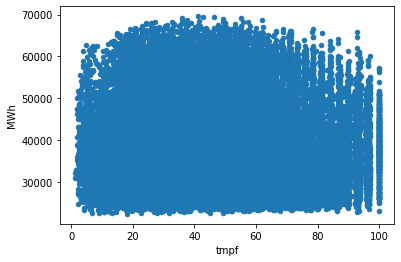

In [ ]:
# some eda - we should be able to predict temperature!
df.plot.scatter(x='tmpf', y='MWh')
plt.show()

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35038 entries, 0 to 35037
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tmpf                     35038 non-null  float64
 1   dwpf                     35038 non-null  float64
 2   relh                     35038 non-null  float64
 3   tmpf_Rolling_Average_1   35038 non-null  float64
 4   tmpf_Rolling_Average_3   35036 non-null  float64
 5   tmpf_Rolling_Average_5   35034 non-null  float64
 6   tmpf_Rolling_Average_10  35029 non-null  float64
 7   tmpf_Rolling_Average_24  35015 non-null  float64
 8   tmpf_Rolling_Average_48  34991 non-null  float64
 9   dwpf_Rolling_Average_1   35038 non-null  float64
 10  dwpf_Rolling_Average_3   35036 non-null  float64
 11  dwpf_Rolling_Average_5   35034 non-null  float64
 12  dwpf_Rolling_Average_10  35029 non-null  float64
 13  dwpf_Rolling_Average_24  35015 non-null  float64
 14  dwpf_Rolling_Average_4

In [ ]:
# Normalize the data by using MinMaxScaler()
# for data prep
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#using minmax Scaler to transform X_train and X_test 
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
#print shape of X_train and X_test 
print(X_train.shape, X_test.shape)

(35038, 24) (8738, 24)


In [ ]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(0,len(sequences)): 
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# save everything as a dataframe
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
Y_train = pd.DataFrame(y_train)
Y_test = pd.DataFrame(y_test)

# reset the index on everything
# issue with dates and integers
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
Y_train.reset_index(inplace=True, drop=True)
Y_test.reset_index(inplace=True, drop=True)

# put X_train and y_train together 
# put X_test and y_test together 
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
print(df_train.shape, df_test.shape)

(35038, 25) (17476, 25)


In [ ]:
# check the head
df_train.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,MWh
0,0.551867,0.438795,0.551867,0.551867,NaN,NaN,NaN,NaN,NaN,0.438795,NaN,NaN,NaN,NaN,NaN,0.551867,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,1.0,28496.388850
1,0.527983,0.438795,0.527983,0.527983,NaN,NaN,NaN,NaN,NaN,0.438795,NaN,NaN,NaN,NaN,NaN,0.527983,NaN,NaN,NaN,NaN,NaN,0.090909,0.0,1.0,27662.443480
2,0.627973,0.450094,0.627973,0.627973,0.568474,NaN,NaN,NaN,NaN,0.450094,0.433269,NaN,NaN,NaN,NaN,0.627973,0.568474,NaN,NaN,NaN,NaN,0.181818,0.0,1.0,27250.044715
3,0.603380,0.470810,0.603380,0.603380,0.585677,NaN,NaN,NaN,NaN,0.470810,0.444230,NaN,NaN,NaN,NaN,0.603380,0.585677,NaN,NaN,NaN,NaN,0.272727,0.0,1.0,26783.226081
4,0.426576,0.397363,0.426576,0.426576,0.551812,0.545578,NaN,NaN,NaN,0.397363,0.430045,0.41444,NaN,NaN,NaN,0.426576,0.551812,0.545578,NaN,NaN,NaN,0.363636,0.0,1.0,26676.468490


In [ ]:
# check the head
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,MWh
0,1.000000,0.470810,1.000000,1.000000,0.969650,0.963489,0.981553,0.996883,0.951324,0.470810,0.454545,0.438373,0.397762,0.356168,0.381422,1.000000,0.969650,0.963489,0.981553,0.996883,0.951324,0.000000,0.0,1.0,NaN
1,1.000000,0.470810,1.000000,1.000000,0.984825,0.972616,0.981553,0.996883,0.965083,0.470810,0.458414,0.440766,0.399053,0.355081,0.380848,1.000000,0.984825,0.972616,0.981553,0.996883,0.965083,0.000000,0.0,1.0,NaN
2,0.962150,0.470810,0.962150,0.962150,0.987360,0.974141,0.977712,0.995227,0.977271,0.470810,0.462282,0.443159,0.400344,0.353994,0.380274,0.962150,0.987360,0.974141,0.977712,0.995227,0.977271,0.090909,0.0,1.0,NaN
3,0.962150,0.470810,0.962150,0.962150,0.974719,0.975666,0.973870,0.993571,0.989460,0.470810,0.462282,0.445552,0.401636,0.352906,0.379699,0.962150,0.974719,0.975666,0.973870,0.993571,0.989460,0.090909,0.0,1.0,NaN
4,0.954964,0.480226,0.954964,0.954964,0.959680,0.975747,0.969300,0.993257,0.995474,0.480226,0.465506,0.449940,0.404003,0.352906,0.378812,0.954964,0.959680,0.975747,0.969300,0.993257,0.995474,0.181818,0.0,1.0,NaN


In [ ]:
#fill missing values with ffill and bfill
df_train = df_train.fillna(method='ffill').fillna(method='bfill')
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,MWh
0,0.551867,0.438795,0.551867,0.551867,0.568474,0.545578,0.399004,0.438546,0.38753,0.438795,0.433269,0.41444,0.336203,0.279755,0.268484,0.551867,0.568474,0.545578,0.399004,0.438546,0.38753,0.000000,0.0,1.0,28496.388850
1,0.527983,0.438795,0.527983,0.527983,0.568474,0.545578,0.399004,0.438546,0.38753,0.438795,0.433269,0.41444,0.336203,0.279755,0.268484,0.527983,0.568474,0.545578,0.399004,0.438546,0.38753,0.090909,0.0,1.0,27662.443480
2,0.627973,0.450094,0.627973,0.627973,0.568474,0.545578,0.399004,0.438546,0.38753,0.450094,0.433269,0.41444,0.336203,0.279755,0.268484,0.627973,0.568474,0.545578,0.399004,0.438546,0.38753,0.181818,0.0,1.0,27250.044715
3,0.603380,0.470810,0.603380,0.603380,0.585677,0.545578,0.399004,0.438546,0.38753,0.470810,0.444230,0.41444,0.336203,0.279755,0.268484,0.603380,0.585677,0.545578,0.399004,0.438546,0.38753,0.272727,0.0,1.0,26783.226081
4,0.426576,0.397363,0.426576,0.426576,0.551812,0.545578,0.399004,0.438546,0.38753,0.397363,0.430045,0.41444,0.336203,0.279755,0.268484,0.426576,0.551812,0.545578,0.399004,0.438546,0.38753,0.363636,0.0,1.0,26676.468490


In [ ]:
#fill missing values with ffill and bfill
df_test = df_test.fillna(method='ffill').fillna(method='bfill')
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,MWh
0,1.000000,0.470810,1.000000,1.000000,0.969650,0.963489,0.981553,0.996883,0.951324,0.470810,0.454545,0.438373,0.397762,0.356168,0.381422,1.000000,0.969650,0.963489,0.981553,0.996883,0.951324,0.000000,0.0,1.0,46880.101852
1,1.000000,0.470810,1.000000,1.000000,0.984825,0.972616,0.981553,0.996883,0.965083,0.470810,0.458414,0.440766,0.399053,0.355081,0.380848,1.000000,0.984825,0.972616,0.981553,0.996883,0.965083,0.000000,0.0,1.0,46880.101852
2,0.962150,0.470810,0.962150,0.962150,0.987360,0.974141,0.977712,0.995227,0.977271,0.470810,0.462282,0.443159,0.400344,0.353994,0.380274,0.962150,0.987360,0.974141,0.977712,0.995227,0.977271,0.090909,0.0,1.0,46880.101852
3,0.962150,0.470810,0.962150,0.962150,0.974719,0.975666,0.973870,0.993571,0.989460,0.470810,0.462282,0.445552,0.401636,0.352906,0.379699,0.962150,0.974719,0.975666,0.973870,0.993571,0.989460,0.090909,0.0,1.0,46880.101852
4,0.954964,0.480226,0.954964,0.954964,0.959680,0.975747,0.969300,0.993257,0.995474,0.480226,0.465506,0.449940,0.404003,0.352906,0.378812,0.954964,0.959680,0.975747,0.969300,0.993257,0.995474,0.181818,0.0,1.0,46880.101852


In [ ]:
#lookback period of 30
n_steps = 30
#applying split_sequence function on df_train to get X_train and y_train
X_train, Y_train = split_sequences(np.array(df_train), n_steps)
#applying split_sequence function on df_test to get X_test and y_test
X_test, Y_test = split_sequences(np.array(df_test), n_steps)
# check the shape for X_train and y_train
print(X_train.shape, Y_train.shape)
# check the shape for X_test and y_test
print(X_test.shape, Y_test.shape) 

(35009, 30, 24) (35009,)
(17447, 30, 24) (17447,)


In [ ]:
# verify no NaN values
print(np.isnan(X_train).sum())
print(np.isnan(Y_train).sum())
print(np.isnan(X_test).sum())
print(np.isnan(Y_test).sum())

0
0
0
0


# Modeling

In [ ]:
n_steps = X_train.shape[1]
n_features = X_train.shape[2]

print(n_steps, n_features)

30 24


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, GRU, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GRU, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM
#assign n_steps and n_features
n_steps = X_train.shape[1]
n_features = X_train.shape[2]
#build a model using Sequential API
model = Sequential()
#Convolution 1D layer with 20 filters and input shape = (30,16)
model.add(Conv1D(filters=20, kernel_size=6, input_shape=(n_steps,n_features))) 
#Maxpooling 1D layer with filter size = 4
model.add(MaxPooling1D(4))
#Convolution 1D layer with 10 filters
model.add(Conv1D(filters=10, kernel_size=2,))
model.add(Conv1D(filters=5, kernel_size=2,))
#Maxpooling 1D layer with filter size = 2
model.add(MaxPooling1D(2))
#Maxpooling 1D layer with filter size = 2
model.add(MaxPooling1D(2))
# LSTM layer with 100 hidden units
model.add(LSTM(100, activation='relu', recurrent_dropout=0.2, return_sequences=True))
#Bidirectional LSTM layer with 50 hidden units
model.add(Bidirectional(LSTM(75, activation='relu', recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(50, activation='relu', recurrent_dropout=0.2, return_sequences=True)))
# GRU layer with 50 hidden units
model.add(GRU(50, activation='relu', recurrent_dropout=0.2, return_sequences=True))
model.add(GRU(30, activation='relu', recurrent_dropout=0.2, return_sequences=True))
#SimpleRNN layer with 40 hidden units
model.add(SimpleRNN(40, activation='relu', recurrent_dropout=0.2))
#Dense Layer 1 with 30 hidden units
model.add(Dense(30, activation='relu'))
#Dense Layer 2 with 20 hidden units
model.add(Dense(20, activation='relu'))
#Dense Layer 3 with 15 hidden units
model.add(Dense(15, activation='relu'))
#Dense Layer 4 with 10 hidden units
model.add(Dense(10, activation='relu'))
#Dropout function with 0.1 probability
model.add(Dropout(0.1))
#Output layer with activation function 'linear' as it is a regression problem
model.add(Dense(1, activation='linear'))
#compile the model using 'adam' optimizer
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
#Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 25, 20)            2900      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 6, 20)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 10)             410       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4, 5)              105       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 5)              0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 5)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 100)            4

In [ ]:
# early stopping with a patience of 20
es = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=20, 
                   verbose=1,
                   restore_best_weights=True)

# fit the model with 100 epochs
history = model.fit(X_train, Y_train,
                    callbacks=[es],
                    epochs=100,
                    batch_size=50,
                    validation_data=(X_test, Y_test),
                    verbose=1,
                    shuffle=True)

Epoch 1/100
701/701 [==============================] - 33s 24ms/step - loss: 330571578.5299 - mae: 13585.3560 - val_loss: 178163376.0000 - val_mae: 10973.3320
Epoch 2/100
701/701 [==============================] - 15s 22ms/step - loss: 115560839.4758 - mae: 8440.8785 - val_loss: 114780904.0000 - val_mae: 8222.6758
Epoch 3/100
701/701 [==============================] - 16s 22ms/step - loss: 102742902.5413 - mae: 7893.5088 - val_loss: 155184976.0000 - val_mae: 10064.6289
Epoch 4/100
701/701 [==============================] - 16s 22ms/step - loss: 97013760.9915 - mae: 7689.8828 - val_loss: 63401660.0000 - val_mae: 6088.1455
Epoch 5/100
701/701 [==============================] - 16s 22ms/step - loss: 94517537.7778 - mae: 7578.2977 - val_loss: 75048512.0000 - val_mae: 7139.1841
Epoch 6/100
701/701 [==============================] - 16s 22ms/step - loss: 92678121.9259 - mae: 7487.6057 - val_loss: 154450320.0000 - val_mae: 10405.5811
Epoch 7/100
701/701 [==============================] - 16s 

# Results & Analysis

In [ ]:
# make a prediction
pred = model.predict(X_test)
pred = np.round(pred,0)

In [ ]:
#print the lowest MAE for the model
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(Y_test, pred))

MAE:  6088.1452161474945


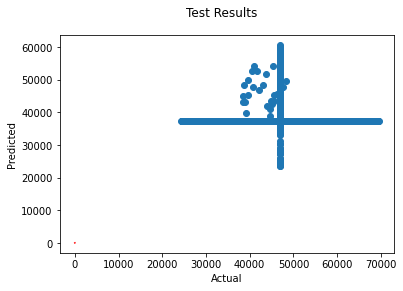

In [ ]:
#plotting the test results, Actuals vs Predicted
actual = Y_test # the actual
plt.scatter(x=actual, y=pred)
x = np.linspace(0,25) 
plt.plot(x, x, color='red')
plt.suptitle('Test Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

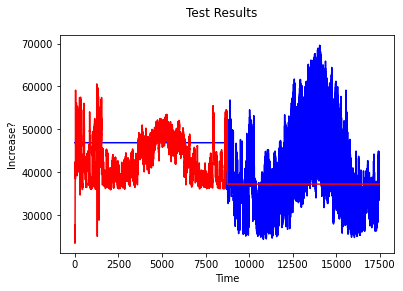

In [ ]:
# show timeseries plot on the train and validation data
plt.plot(np.arange(X_test.shape[0]), Y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.suptitle('Test Results')
plt.xlabel('Time')
plt.ylabel('Increase?')
plt.show()

After running several different models with varying stacked layers and levels of complexity, we landed on a model that gave us the best accuracy with a mean average error of ______. Through different iterations we found that networks with many different types of stacked layers generally performed better. Additionally, tweaking different parameters within each layer as well as the overall model, such as number of epochs and the batch size were additional levers we controlled in an attempt to generate the best performing model.

The final model consisted of a total of __ layers, with many different types of models leveraged throughout the course.

In the convolutional layers, we adjusted both the level of filters, as well as the kernel size, landing on a filter size of 10 and a kernel size of 2 in the final version of the model. We attempted to both increase and decrease the size of both to try and see if it would have a material impact on the model performance.

In the LSTM, SimpleRNN, GRU and Dense layers we primarily adjusted the number of hidden units in each layer. 

We used early stopping in the model with a patience of 20 in our final model as we found that models with this feature generally performed better.

Finally, we increased the number of epochs and tried to adjust the batch size both upwards and downwards, landing on ___.

Overall, this exercise gave us an appreciation how changing the architecture of a neural network can yield better model performance. If the energy operators in Texas had employed more robust forecasting efforts of how their demand may be impacted by weather, especially extreme cases, maybe the damage done to the state might have been preventable, at least to some extent. 

